# Exploratory Data Analysis

**`Goal`:** Look at differences across gender groups broken down by different job categories and confounders such as location, previous experience, etc.

### EDA Ideas
- ~Distributions of hourly rates grouped by male and female (so two distributions). Seaborn might be a good choice for this. Could be kdeplots, voilin plots, or box plots (preffered).~
- ~Distributions of average hourly rate by skill -- we could take the average of the hourly rate from all rows that have the skill and then make a bar plot ordered from lowest average hourly rate to highest average hourly rate.~
    - ~Could make this same plot but broken down by gender, and then plot the differences - this might be a bit more complicated~
- ~For correlation, we could try [phi_k correlation](https://phik.readthedocs.io/en/latest/#:~:text=Phi_K%20is%20a%20new%20and,categorical%2C%20ordinal%20and%20interval%20variables.) and only look at verifications and their relation to pay? – phik because apparently it let's you look at correlations between categorical and continuous vars. Do preferred freelancers actually earn more than the others?~
- Pairplots and jointplots looking at gender and other variables
- **Above and beyond**: heatmap of the US with the average hourly rate of places mapped out across the US. Not exactly sure about the implementation, but I know Plotly has some heatmap plot types that should make it easier.

- Check median earning for badged vs. badgeless individuals

- directions:
    - look for correlations between lack of completed jobs & gender
        - Missigno package might be helpful here (especially the heatmap function). It shows correlation between missing values
    - gender + ratings
    - ratings + hourly rate
    - gender saturation in different industries + industry average hourly rate
    - when women charge at industry average/higher, do they have less reviews/jobs/etc.
    - effects of location
    - effects of gender on jobs completed, on time, on budget → bring in repeat hire?
    - effects of certifications, are women more/less likely to have them

### 1. Importing packages

In [1]:
#Import visualization libraries
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "svg"

#Data manipulation packages
import numpy as np
import pandas as pd

#Correlation
import phik

### 2. Loading the data

In [23]:
df = pd.read_csv('/work/DS4SG-Gender-Inequality/data/gender-annotated/cleaned-gender-annotated-v5.csv', low_memory=False)
df.head()

,search_query,name,gender,profile_link,location,hourly_rate,pay_grade,avg_rating,num_reviews,num_recommendations,...,pct_certifications_requirements_engineering_1,skill_furniture_removalist,skill_workday_security,skill_oracle_ebs_tech_integration,pct_certifications_google_webmaster_central_1,skill_modx,skill_cubecart,skill_phaser,skill_drilling_engineering,skill_casperjs
0,designer,Milen,male,https://www.freelancer.com/u/MsCaddServices,Edmonds,45,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,designer,Jeremy,male,https://www.freelancer.com/u/Conescu,Orinda,90,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,designer,Nichole,female,https://www.freelancer.com/u/NicholeMW,Holly,25,4.0,5.0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,designer,Robert,male,https://www.freelancer.com/u/rhoenig1277,Beloit,75,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,designer,Jean-Paul,male,https://www.freelancer.com/u/PaulCarriazo,Miami,19,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Quick look at data

In [ ]:
#Excluding skills
exclude_skill = df.loc[:,df.columns[:19]]
exclude_skill.describe()

,hourly_rate,pay_grade,avg_rating,num_reviews,num_recommendations,pct_jobs_completed,pct_on_budget,pct_on_time
count,9769.000000,9769.000000,9769.000000,9769.000000,9769.000000,1698.000000,1602.000000,1605.000000
mean,37.858020,0.570877,0.820719,2.713379,0.248951,97.636042,97.914482,97.355763
std,42.532726,1.460199,1.839538,24.923309,5.077577,8.111374,9.720879,10.954618
min,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000
75%,45.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000
max,900.000000,9.800000,5.000000,1076.000000,468.000000,100.000000,100.000000,100.000000


Based on percentiles, we should probably be using the median rather than the mean

#### a. Gender proportions in our dataset

In [ ]:
display(df.gender.value_counts())

display(df.gender.value_counts(normalize=True))

male      6694
female    3075
Name: gender, dtype: int64

male      0.685229
female    0.314771
Name: gender, dtype: float64

Almost twice as much males than females

### 4. Correlation across variables

In [ ]:
# Create the correlation table (with pearson's r)
corr_df = df.corr()

corr_df

,hourly_rate,pay_grade,avg_rating,num_reviews,num_recommendations,pct_jobs_completed,pct_on_budget,pct_on_time,verification_preferred_freelancer,verification_identity_verified,...,pct_certifications_requirements_engineering_1,skill_furniture_removalist,skill_workday_security,skill_oracle_ebs_tech_integration,pct_certifications_google_webmaster_central_1,skill_modx,skill_cubecart,skill_phaser,skill_drilling_engineering,skill_casperjs
hourly_rate,1.000000,0.042920,0.013254,0.022288,0.118346,0.032071,0.059115,0.031937,0.062674,0.067473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pay_grade,0.042920,1.000000,0.848076,0.433000,0.190868,0.000597,-0.057189,-0.102792,0.255564,0.342496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating,0.013254,0.848076,1.000000,0.241635,0.096161,-0.024227,0.168780,0.233676,0.158699,0.299178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_reviews,0.022288,0.433000,0.241635,1.000000,0.301698,-0.010858,-0.004604,-0.033011,0.149834,0.137926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_recommendations,0.118346,0.190868,0.096161,0.301698,1.000000,0.003840,0.000546,-0.011407,0.212514,0.072564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skill_modx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skill_cubecart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skill_phaser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skill_drilling_engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### a. Success metrics and verifications

**Linear correlation (pearson's r)**

In [ ]:
#Excluding skill and certifications
pearson_corr_df = corr_df.iloc[:14,:14]
pd.DataFrame(pearson_corr_df).style.background_gradient(cmap='coolwarm')

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning:

All-NaN slice encountered

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning:

All-NaN slice encountered



,hourly_rate,pay_grade,avg_rating,num_reviews,num_recommendations,pct_jobs_completed,pct_on_budget,pct_on_time,verification_preferred_freelancer,verification_identity_verified,verification_payment_verified,verification_phone_verified,verification_email_verified,verification_facebook_connected
hourly_rate,1.000000,0.042920,0.013254,0.022288,0.118346,0.032071,0.059115,0.031937,0.062674,0.067473,0.036965,0.008437,nan,-0.010648
pay_grade,0.042920,1.000000,0.848076,0.433000,0.190868,0.000597,-0.057189,-0.102792,0.255564,0.342496,0.125612,0.147182,nan,0.001457
avg_rating,0.013254,0.848076,1.000000,0.241635,0.096161,-0.024227,0.168780,0.233676,0.158699,0.299178,0.133597,0.162170,nan,-0.001514
num_reviews,0.022288,0.433000,0.241635,1.000000,0.301698,-0.010858,-0.004604,-0.033011,0.149834,0.137926,0.021428,0.041543,nan,-0.008167
num_recommendations,0.118346,0.190868,0.096161,0.301698,1.000000,0.003840,0.000546,-0.011407,0.212514,0.072564,0.016736,0.021123,nan,0.010651
pct_jobs_completed,0.032071,0.000597,-0.024227,-0.010858,0.003840,1.000000,0.037252,0.088976,0.025183,-0.013932,0.080524,0.008883,nan,0.035633
pct_on_budget,0.059115,-0.057189,0.168780,-0.004604,0.000546,0.037252,1.000000,0.555358,-0.003351,-0.055237,-0.022354,-0.004523,nan,0.035893
pct_on_time,0.031937,-0.102792,0.233676,-0.033011,-0.011407,0.088976,0.555358,1.000000,-0.002698,-0.083022,0.016018,0.006153,nan,0.022186
verification_preferred_freelancer,0.062674,0.255564,0.158699,0.149834,0.212514,0.025183,-0.003351,-0.002698,1.000000,0.142446,0.050259,0.031435,nan,0.044585
verification_identity_verified,0.067473,0.342496,0.299178,0.137926,0.072564,-0.013932,-0.055237,-0.083022,0.142446,1.000000,0.174971,0.209606,nan,0.009187


**Strong positive correlation**
- avg_rating and pay_grade

**Weak positive correlation**
- num_reviews and pay_grade
- pct_budget and pct_on_time
- verification_identity_verified and pay_grade (0.3)
- verification_identity_verified and avg_rating (0.34)

**Phi_k correlation**

In [ ]:
#Excluding skill and certifications
phik_corr_df = df.iloc[:,5:19].phik_matrix()
pd.DataFrame(phik_corr_df).style.background_gradient(cmap='coolwarm')

interval columns not set, guessing: ['hourly_rate', 'pay_grade', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_budget', 'pct_on_time']
/usr/local/lib/python3.7/site-packages/phik/data_quality.py:84: UserWarning: Not enough unique value for variable verification_email_verified for analysis 1. Dropping this column
  col, df[col].nunique()


,hourly_rate,pay_grade,avg_rating,num_reviews,num_recommendations,pct_jobs_completed,pct_on_budget,pct_on_time,verification_preferred_freelancer,verification_identity_verified,verification_payment_verified,verification_phone_verified,verification_facebook_connected
hourly_rate,1.000000,0.109112,0.000000,0.020883,0.369122,0.284305,0.000000,0.000000,0.060183,0.043721,0.028870,0.041766,0.000000
pay_grade,0.109112,1.000000,0.623693,0.659390,0.649402,0.093290,0.000000,0.188565,0.447835,0.445533,0.174308,0.207457,0.000000
avg_rating,0.000000,0.623693,1.000000,0.106616,0.032145,0.206069,0.697473,0.609560,0.148358,0.279778,0.124955,0.150025,0.010475
num_reviews,0.020883,0.659390,0.106616,1.000000,0.696315,0.000000,0.097843,0.138179,0.267009,0.133901,0.031601,0.010997,0.037288
num_recommendations,0.369122,0.649402,0.032145,0.696315,1.000000,0.000000,0.000000,0.183072,0.099809,0.023159,0.000000,0.000000,0.007449
pct_jobs_completed,0.284305,0.093290,0.206069,0.000000,0.000000,1.000000,0.169945,0.346694,0.000000,0.000000,0.131808,0.086407,0.008750
pct_on_budget,0.000000,0.000000,0.697473,0.097843,0.000000,0.169945,1.000000,0.905468,0.000000,0.117485,0.075495,0.000000,0.050384
pct_on_time,0.000000,0.188565,0.609560,0.138179,0.183072,0.346694,0.905468,1.000000,0.036760,0.166509,0.078630,0.075890,0.070223
verification_preferred_freelancer,0.060183,0.447835,0.148358,0.267009,0.099809,0.000000,0.000000,0.036760,1.000000,0.218515,0.074857,0.043469,0.065749
verification_identity_verified,0.043721,0.445533,0.279778,0.133901,0.023159,0.000000,0.117485,0.166509,0.218515,1.000000,0.270567,0.322471,0.000000


*Correlation here does not necessarily mean linear correlation (see pearson k above for linear). Only that there is some pattern to the relationship between the variables (e.g. it could be non-linear)

**Strong correlation (emboldened means significant)**

- **avg_rating and pay_grade**
- **num_reviews and pay_grade**
- num_recommendations and pay_grade
- avg_rating and pct_on_budget
- avg_rating and pct_on_time
- **num_recommendations and num_reviews**
- **pct_on_budget and pct_on_time (0.90)**

**Weak correlation**
- hourly_rate and num_recommendations
- verification_preferred_freelancer and pay_grade (0.44)

In [ ]:
#Quick look at significance of the correlations
phik_sig_df = df.iloc[:,5:19].significance_matrix()
pd.DataFrame(phik_sig_df).style.background_gradient(cmap='Blues')

interval columns not set, guessing: ['hourly_rate', 'pay_grade', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_budget', 'pct_on_time']
/usr/local/lib/python3.7/site-packages/phik/data_quality.py:84: UserWarning: Not enough unique value for variable verification_email_verified for analysis 1. Dropping this column
  col, df[col].nunique()


,hourly_rate,pay_grade,avg_rating,num_reviews,num_recommendations,pct_jobs_completed,pct_on_budget,pct_on_time,verification_preferred_freelancer,verification_identity_verified,verification_payment_verified,verification_phone_verified,verification_facebook_connected
hourly_rate,71.220145,2.352370,0.363449,2.711672,3.580674,1.644788,-1.541821,-1.070734,3.289775,2.885878,1.893725,2.057200,-0.045599
pay_grade,2.352370,116.734842,81.674864,18.436207,6.796720,4.657541,2.000913,2.603001,15.544308,29.674169,12.628134,17.830055,-1.821822
avg_rating,0.363449,81.674864,96.279621,11.609783,3.245172,3.662644,4.234286,4.746384,12.993617,26.838273,12.972337,17.975150,0.687469
num_reviews,2.711672,18.436207,11.609783,26.002372,6.997663,0.097768,1.732174,2.508916,6.956919,7.714432,1.852507,1.811549,2.328372
num_recommendations,3.580674,6.796720,3.245172,6.997663,9.174377,0.963486,-0.624873,2.778907,4.711781,3.202467,0.508410,0.589399,1.525156
pct_jobs_completed,1.644788,4.657541,3.662644,0.097768,0.963486,36.285813,2.961135,5.318976,0.437597,0.151362,3.996352,1.263588,0.521892
pct_on_budget,-1.541821,2.000913,4.234286,1.732174,-0.624873,2.961135,29.946820,16.910486,-0.332991,2.457854,1.425986,0.575954,0.699920
pct_on_time,-1.070734,2.603001,4.746384,2.508916,2.778907,5.318976,16.910486,32.060531,0.706689,3.880879,1.151921,1.054485,1.460959
verification_preferred_freelancer,3.289775,15.544308,12.993617,6.956919,4.711781,0.437597,-0.332991,0.706689,24.447391,12.286246,5.456660,3.644455,4.205118
verification_identity_verified,2.885878,29.674169,26.838273,7.714432,3.202467,0.151362,2.457854,3.880879,12.286246,98.077413,17.790943,25.285074,0.336265


Summarizing from linear and phik correlation, there seems to be significant relationship between:
- **avg_rating and pay_grade**
- **num_reviews and pay_grade**
- **pct_on_buget and pct_on_time (0.90)**

#### b. Success metrics and badges

In [ ]:
#Fill badge NAs with False
df.loc[:,['badge_preferred_freelancer','badge_verified']] = df.loc[:,['badge_preferred_freelancer',
                                                                      'badge_verified']].fillna(False)

In [ ]:
col_idx = [*range(5,13)]
badges_idx = list(np.argwhere(df.columns.str.contains('badge_')).flatten())
col_idx.extend(badges_idx)
col_idx

#Excluding skill and certifications
badges_corr_df = df.iloc[:,col_idx].phik_matrix()

interval columns not set, guessing: ['hourly_rate', 'pay_grade', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_budget', 'pct_on_time']


In [ ]:
pd.DataFrame(badges_corr_df.iloc[:,-3:]).style.background_gradient(cmap='coolwarm')

,badge_plus_membership,badge_preferred_freelancer,badge_verified
hourly_rate,0.038074,0.060183,0.060760
pay_grade,0.197179,0.447835,0.278559
avg_rating,0.116626,0.148358,0.120710
num_reviews,0.065063,0.267009,0.175989
num_recommendations,0.013852,0.099809,0.097829
pct_jobs_completed,0.014922,0.000000,0.107830
pct_on_budget,0.131525,0.000000,0.000000
pct_on_time,0.076212,0.036760,0.086643
badge_plus_membership,1.000000,0.191885,0.259166
badge_preferred_freelancer,0.191885,1.000000,0.497581


No real correlation between badges and success/performance metrics.

Possibly:
- badge_preferred_freelancer and pay_grade?

#### c. Correlation between gender and success metrics?

In [ ]:
#Get position of gender
gender_idx = list(np.argwhere(df.columns == 'gender').flatten())

#Get success/performance metrics
gender_idx.extend(col_idx)

gender_success_df = df.iloc[:,gender_idx].phik_matrix()

interval columns not set, guessing: ['hourly_rate', 'pay_grade', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_budget', 'pct_on_time']


In [ ]:
pd.DataFrame(gender_success_df.iloc[:,0]).style.background_gradient(cmap='coolwarm')

,gender
gender,1.000000
hourly_rate,0.043207
pay_grade,0.079903
avg_rating,0.059494
num_reviews,0.028678
num_recommendations,0.007596
pct_jobs_completed,0.000000
pct_on_budget,0.030993
pct_on_time,0.000000
badge_plus_membership,0.000000


Broadly, it appears not

### 4. Gender proportion across the different industries

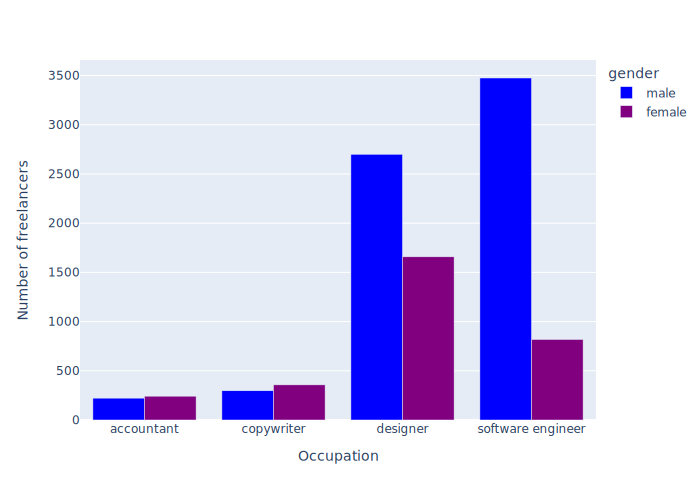

In [4]:
job_gend_count = df.groupby(['search_query','gender']).agg(count=('name','count')).reset_index()

fig = px.bar(job_gend_count, x="search_query", y="count", 
             color="gender", color_discrete_sequence=["blue", "purple"], 
             category_orders={"gender": ["male", "female"]},
             barmode="group", labels={"search_query":'Occupation', "count":'Number of freelancers'})
fig.show()

Despite males doubling females in our dataset, we find that the counts for accountant and copywriter are pretty similar. Might be helpful to look at proportion of the data

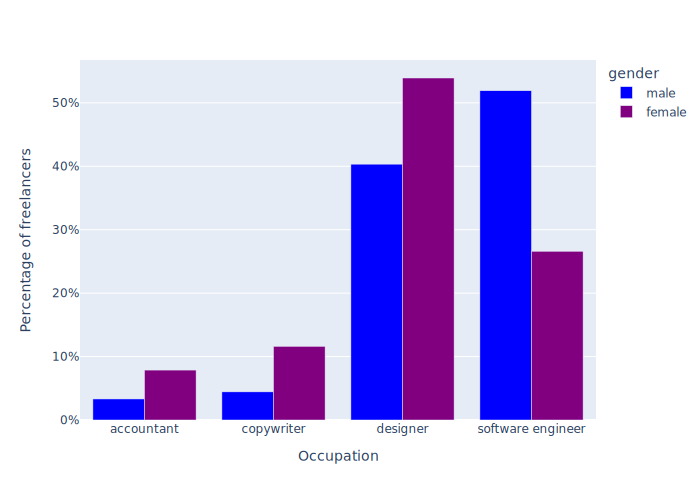

In [5]:
job_gend_count['gender_ratio'] = job_gend_count.groupby(['gender'])['count'].transform(lambda x: x/x.sum())

fig = px.bar(job_gend_count, x="search_query", y="gender_ratio", 
             color="gender", color_discrete_sequence=["blue", "purple"], 
             category_orders={"gender": ["male", "female"]},
             barmode="group", labels={"search_query":'Occupation', 
             "gender_ratio":'Percentage of freelancers'})

fig.layout.yaxis.tickformat = ',.0%'

fig.show()

A larger proportion of male freelancers were technically inclined (designer and software engineer) accounting for 92% of the male freelancer. Female Designer and software engineer freelancers accounted for 81% of the female freelancers in the dataset.

Copywriting and accounting tended to have more females than males (even despite the huge sample size disparity)

### 5. Gender and success/performance metrics

#### a. Gender and job success report percentages (broadly)
Here we look at the broad gender difference before splitting by job

In [6]:
#Get the pct_ metric columns
pct_metrics_with_gend = [col for col in df.columns if 'pct_' in col][:3]

#Add gender
pct_metrics_with_gend.append('gender')

#Melt df
pct_df = pd.melt(df.loc[:,pct_metrics_with_gend],['gender'],var_name='metric')

#Collapse melted variables using groupby and compute group median pct
pct_df_melt = pct_df.groupby(['metric','gender']).agg(mean=('value','mean'),count=('value','count')).reset_index()

pct_df_melt.head()

,metric,gender,mean,count
0,pct_jobs_completed,female,98.350962,416
1,pct_jobs_completed,male,97.404056,1282
2,pct_on_budget,female,98.575377,398
3,pct_on_budget,male,97.696013,1204
4,pct_on_time,female,97.273183,399


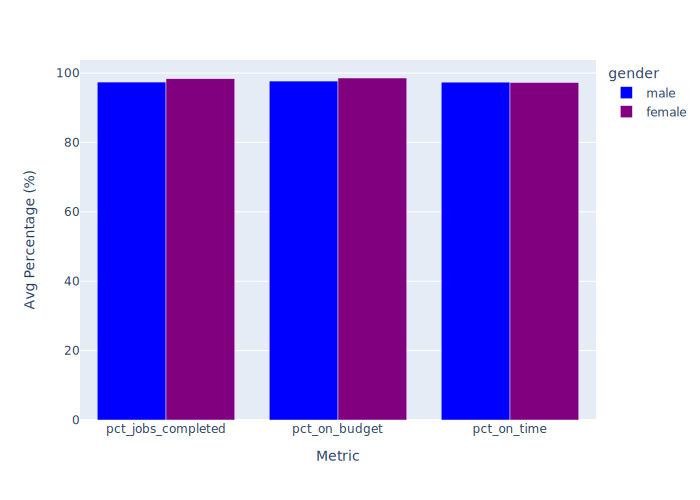

In [7]:
fig = px.bar(pct_df_melt, x="metric", y="mean", 
             color="gender", color_discrete_sequence=["blue", "purple"], hover_data=["mean", "count"],
             category_orders={"gender": ["male", "female"]},
             barmode="group", labels={"metric":'Metric', "mean":'Avg Percentage (%)'})
fig.show()

Roughly the same on average. Women who did complete jobs didn't appear to be frowned on more than mean in terms of timely and cost-congruent completion

In [8]:
def plot_violin_with_points(df,x,y,
                            xaxis_title,
                            yaxis_title,
                            pointpos_male,
                            pointpos_female,
                            show_legend):

    pointpos_male = pointpos_male 
    pointpos_female = pointpos_female 
    show_legend = show_legend

    fig = go.Figure()

    for i in range(0,len(pd.unique(df[x]))):
        fig.add_trace(go.Violin(x=df[x][(df['gender'] == 'male') &
                                (df[x] == pd.unique(df[x])[i])],

                                y=df[y][(df['gender'] == 'male')&
                                (df[x] == pd.unique(df[x])[i])],

                                legendgroup='M', scalegroup='M', name='male',
                                side='negative',
                                pointpos=pointpos_male[i], # where to position points
                                line_color='blue',
                                showlegend=show_legend[i])
                )
        fig.add_trace(go.Violin(x=df[x][(df['gender'] == 'female') &
                                (df[x] == pd.unique(df[x])[i])],

                                y=df[y][(df['gender'] == 'female')&
                                (df[x] == pd.unique(df[x])[i])],
                                legendgroup='F', scalegroup='F', name='female',
                                side='positive',
                                pointpos=pointpos_female[i],
                                line_color='purple',
                                showlegend=show_legend[i])
                )

    # update characteristics shared by all traces
    fig.update_traces(meanline_visible=True,
                    points='outliers', # show all points
                    jitter=0.05)
                    
    fig.update_layout(
        autosize=True,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        violingap=0, violingroupgap=0, violinmode='overlay')

    fig.show()


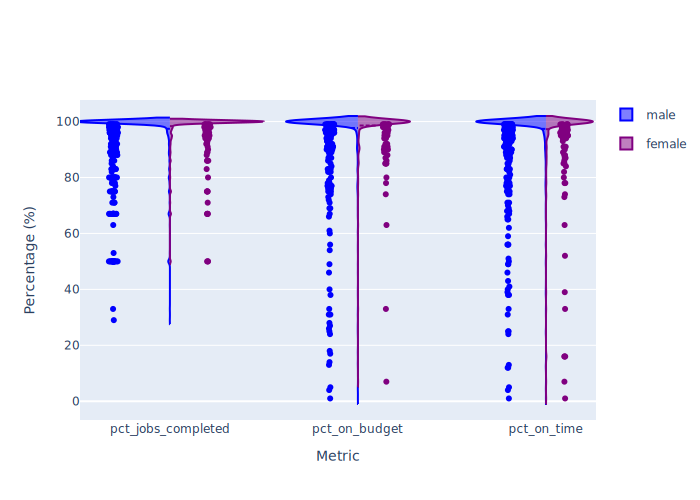

In [9]:
pointpos_male = [-0.6,-0.3,-0.4]
pointpos_female = [0.4,0.3,0.2]
show_legend = [True,False,False]

plot_violin_with_points(pct_df,'metric','value','Metric','Percentage (%)',pointpos_male,
                        pointpos_female, show_legend)

Looking at averages, its roughly similar across both genders. When we consider outliers

#### b. Gender, average rating, and pay grade
We only look at people who have been reviewed (for average rating) and people who have completed job (for pay grade)

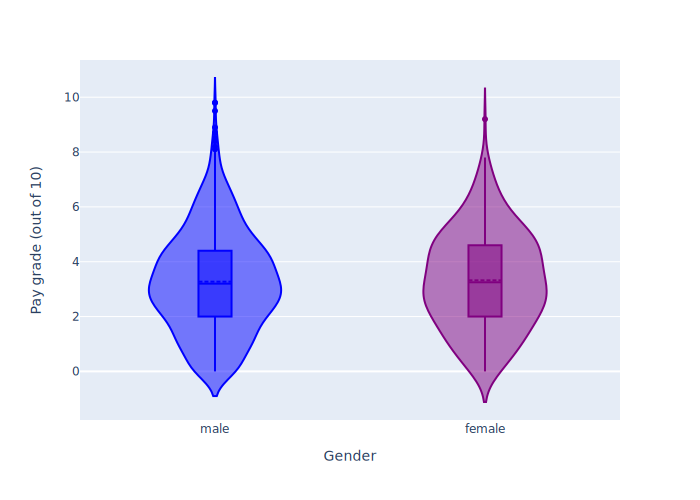

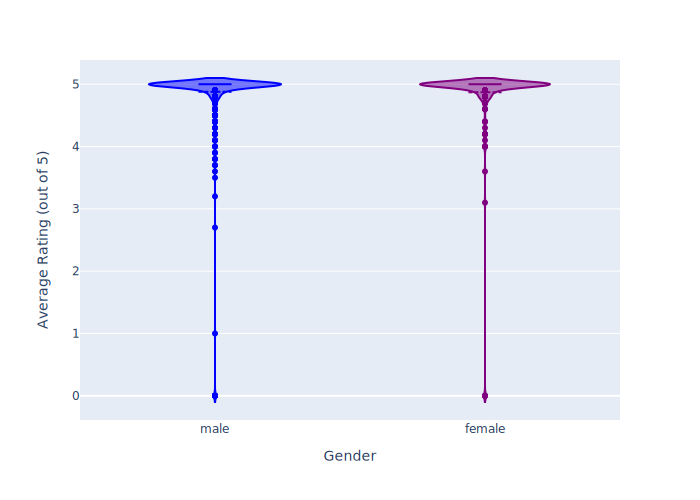

In [10]:
#Get people who have completed jobs for comparing pay grade
pay_grade_df = df[df.pct_jobs_completed.notnull()]

#Get people who have been reviewed for comparing average rating
reviewed_df = df[df.num_reviews > 0]

for df, metric, axis_title in [(pay_grade_df, 'pay_grade','Pay grade (out of 10)'),
                               (reviewed_df, 'avg_rating','Average Rating (out of 5)')]:

    fig = px.violin(df, x='gender', y=metric, color='gender',
                    color_discrete_sequence=["blue", "purple"],
                    category_orders={"gender": ["male", "female"]},
                    labels = {'gender':'Gender', metric:axis_title})

    fig.update_traces(box_visible=True, meanline_visible=True, showlegend=False)

    fig.show()

- Average rating pretty much the same
- Pay grade pretty much the same (i.e. men and women seem to earn similarly). However, we note that pay grade doesn't easily allow us distinguish between the absolute earnings

### 5. Industry average rating and pay grade for male vs. female

#### a. Pay grade

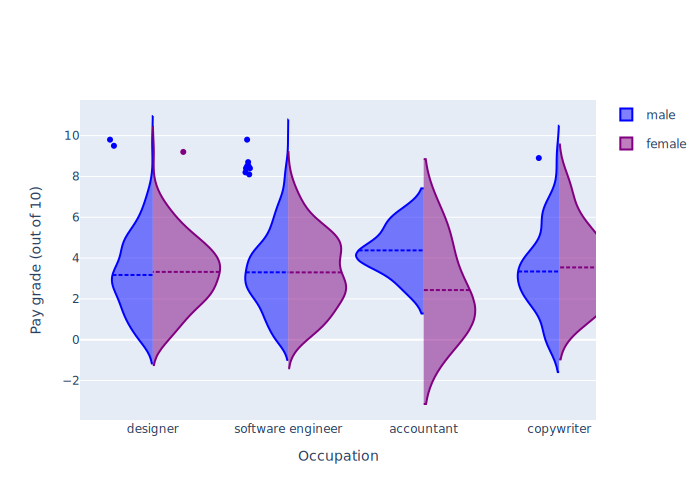

In [11]:
pointpos_male = [-0.6,-0.6,-0.6,-0.3]
pointpos_female = [0.45,0.55,0.6,0.4]
show_legend = [True,False,False,False]

plot_violin_with_points(pay_grade_df,'search_query','pay_grade','Occupation',
                        'Pay grade (out of 10)',pointpos_male, pointpos_female, 
                        show_legend)

Interestingly, despite more women (and a higher proportion of women freelancers) being accountants, male accountants seem to earn more on freelancer.com than women. 

#### b. Average rating

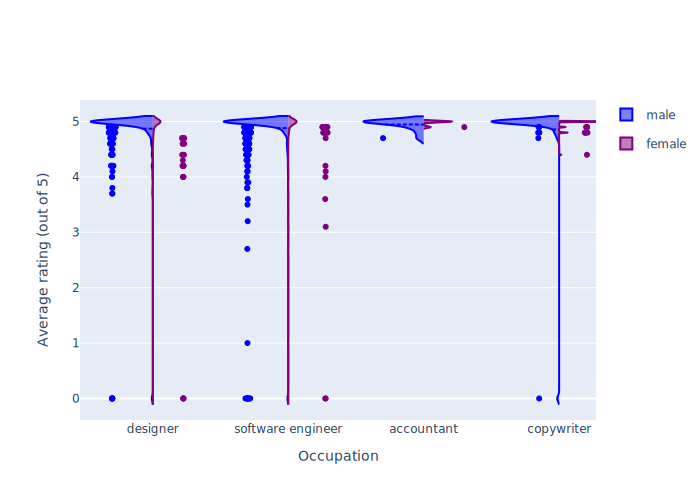

In [12]:
pointpos_male = [-0.6,-0.6,-0.6,-0.3]
pointpos_female = [0.45,0.55,0.6,0.4]
show_legend = [True,False,False,False]

plot_violin_with_points(reviewed_df,'search_query','avg_rating','Occupation',
                        'Average rating (out of 5)',pointpos_male, pointpos_female, 
                        show_legend)

#### c. Median average rating

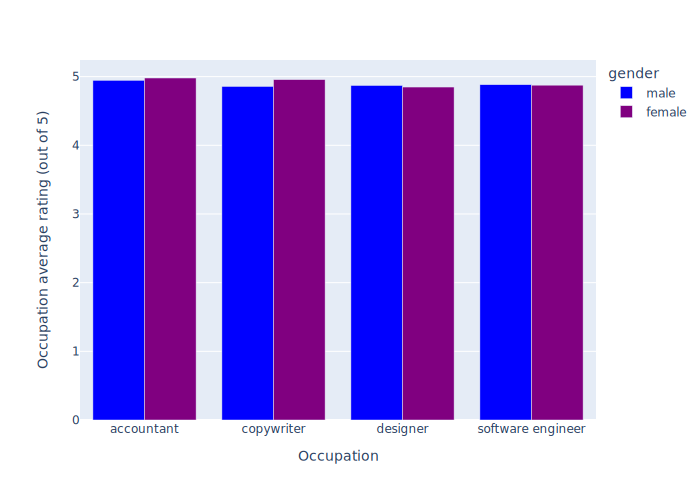

In [13]:
mean_reviewed_df = reviewed_df.groupby(['search_query','gender']).agg(occupation_avg_rating = ('avg_rating',np.mean)).reset_index()

fig = px.bar(mean_reviewed_df, x="search_query", y="occupation_avg_rating", 
             color="gender", color_discrete_sequence=["blue", "purple"], 
             category_orders={"gender": ["male", "female"]},
             barmode="group", labels={'search_query':'Occupation', 
             'occupation_avg_rating':'Occupation average rating (out of 5)'})
fig.show()


### 6. Hourly rates exploration

**`To do:`** Check statistical significance? But we know there are confounders. Any point?

#### a. Hourly rates by gender broadly

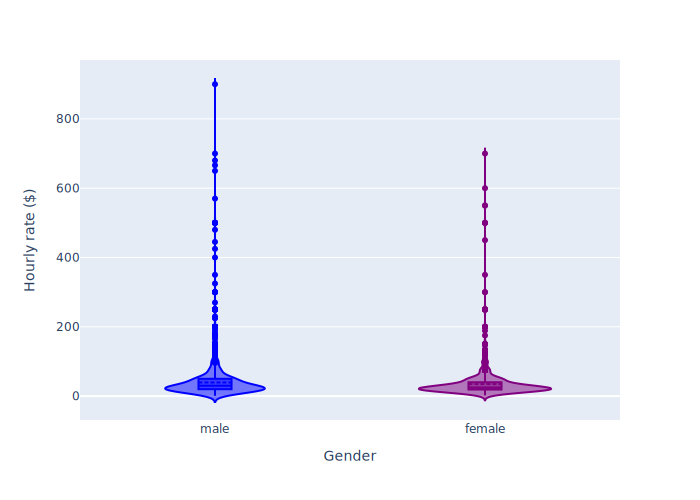

In [24]:
fig = px.violin(df, x='gender', y="hourly_rate", color='gender',
                color_discrete_sequence=["blue", "purple"],
                labels = {'gender':'Gender', 'hourly_rate':'Hourly rate ($)'})

fig.update_traces(box_visible=True, meanline_visible=True, showlegend=False)

#fig.update_layout(template='simple_white')

fig.show()

Males, on average, charge higher per hour, than females

#### b. Hourly rate by gender grouped by job category

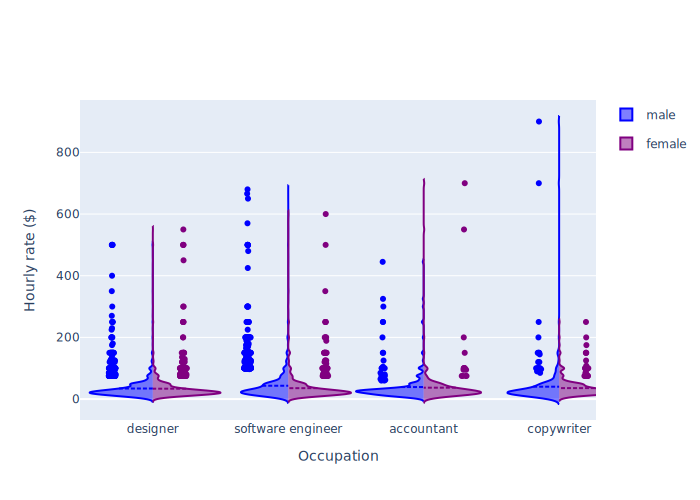

In [25]:
pointpos_male = [-0.6,-0.6,-0.6,-0.3]
pointpos_female = [0.45,0.55,0.6,0.4]
show_legend = [True,False,False,False]

plot_violin_with_points(df,'search_query','hourly_rate','Occupation','Hourly rate ($)',pointpos_male,
                        pointpos_female, show_legend)

Across a lot of occupations however (except software engineering and copywriting), males and females appear to charge roughly the same hourly rate, on average.

#### c. Median hourly pay by skill

In [26]:
#Dictionary to store skills and their median pays
skill_avg_pay = {'skill':[], 'record_count':[],'median_hourly_rate':[]}

#Get all the skills in the dataframe
skills = [col for col in df.columns if 'skill_' in col]

#Iterate through each skill and compute the average hourly rate
for skill in skills:
    skill_avg_pay['skill'].append(skill.replace('skill_','').replace('_',' '))
    skill_avg_pay['record_count'].append(df[skill].notnull().sum())
    skill_avg_pay['median_hourly_rate'].append(np.median(df.loc[df[skill].notnull(),'hourly_rate']))

#Make pandas dataframe
skill_avg_pay_df = pd.DataFrame(skill_avg_pay) 

#Rearrange dataframe from highest to lowest
skill_avg_pay_df = skill_avg_pay_df.sort_values('median_hourly_rate',ascending=False).reset_index(drop=True)

#Get top 10 that have at least 20 individuals with the skill
top_10 = skill_avg_pay_df.query("record_count >= 20")[:10]

/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



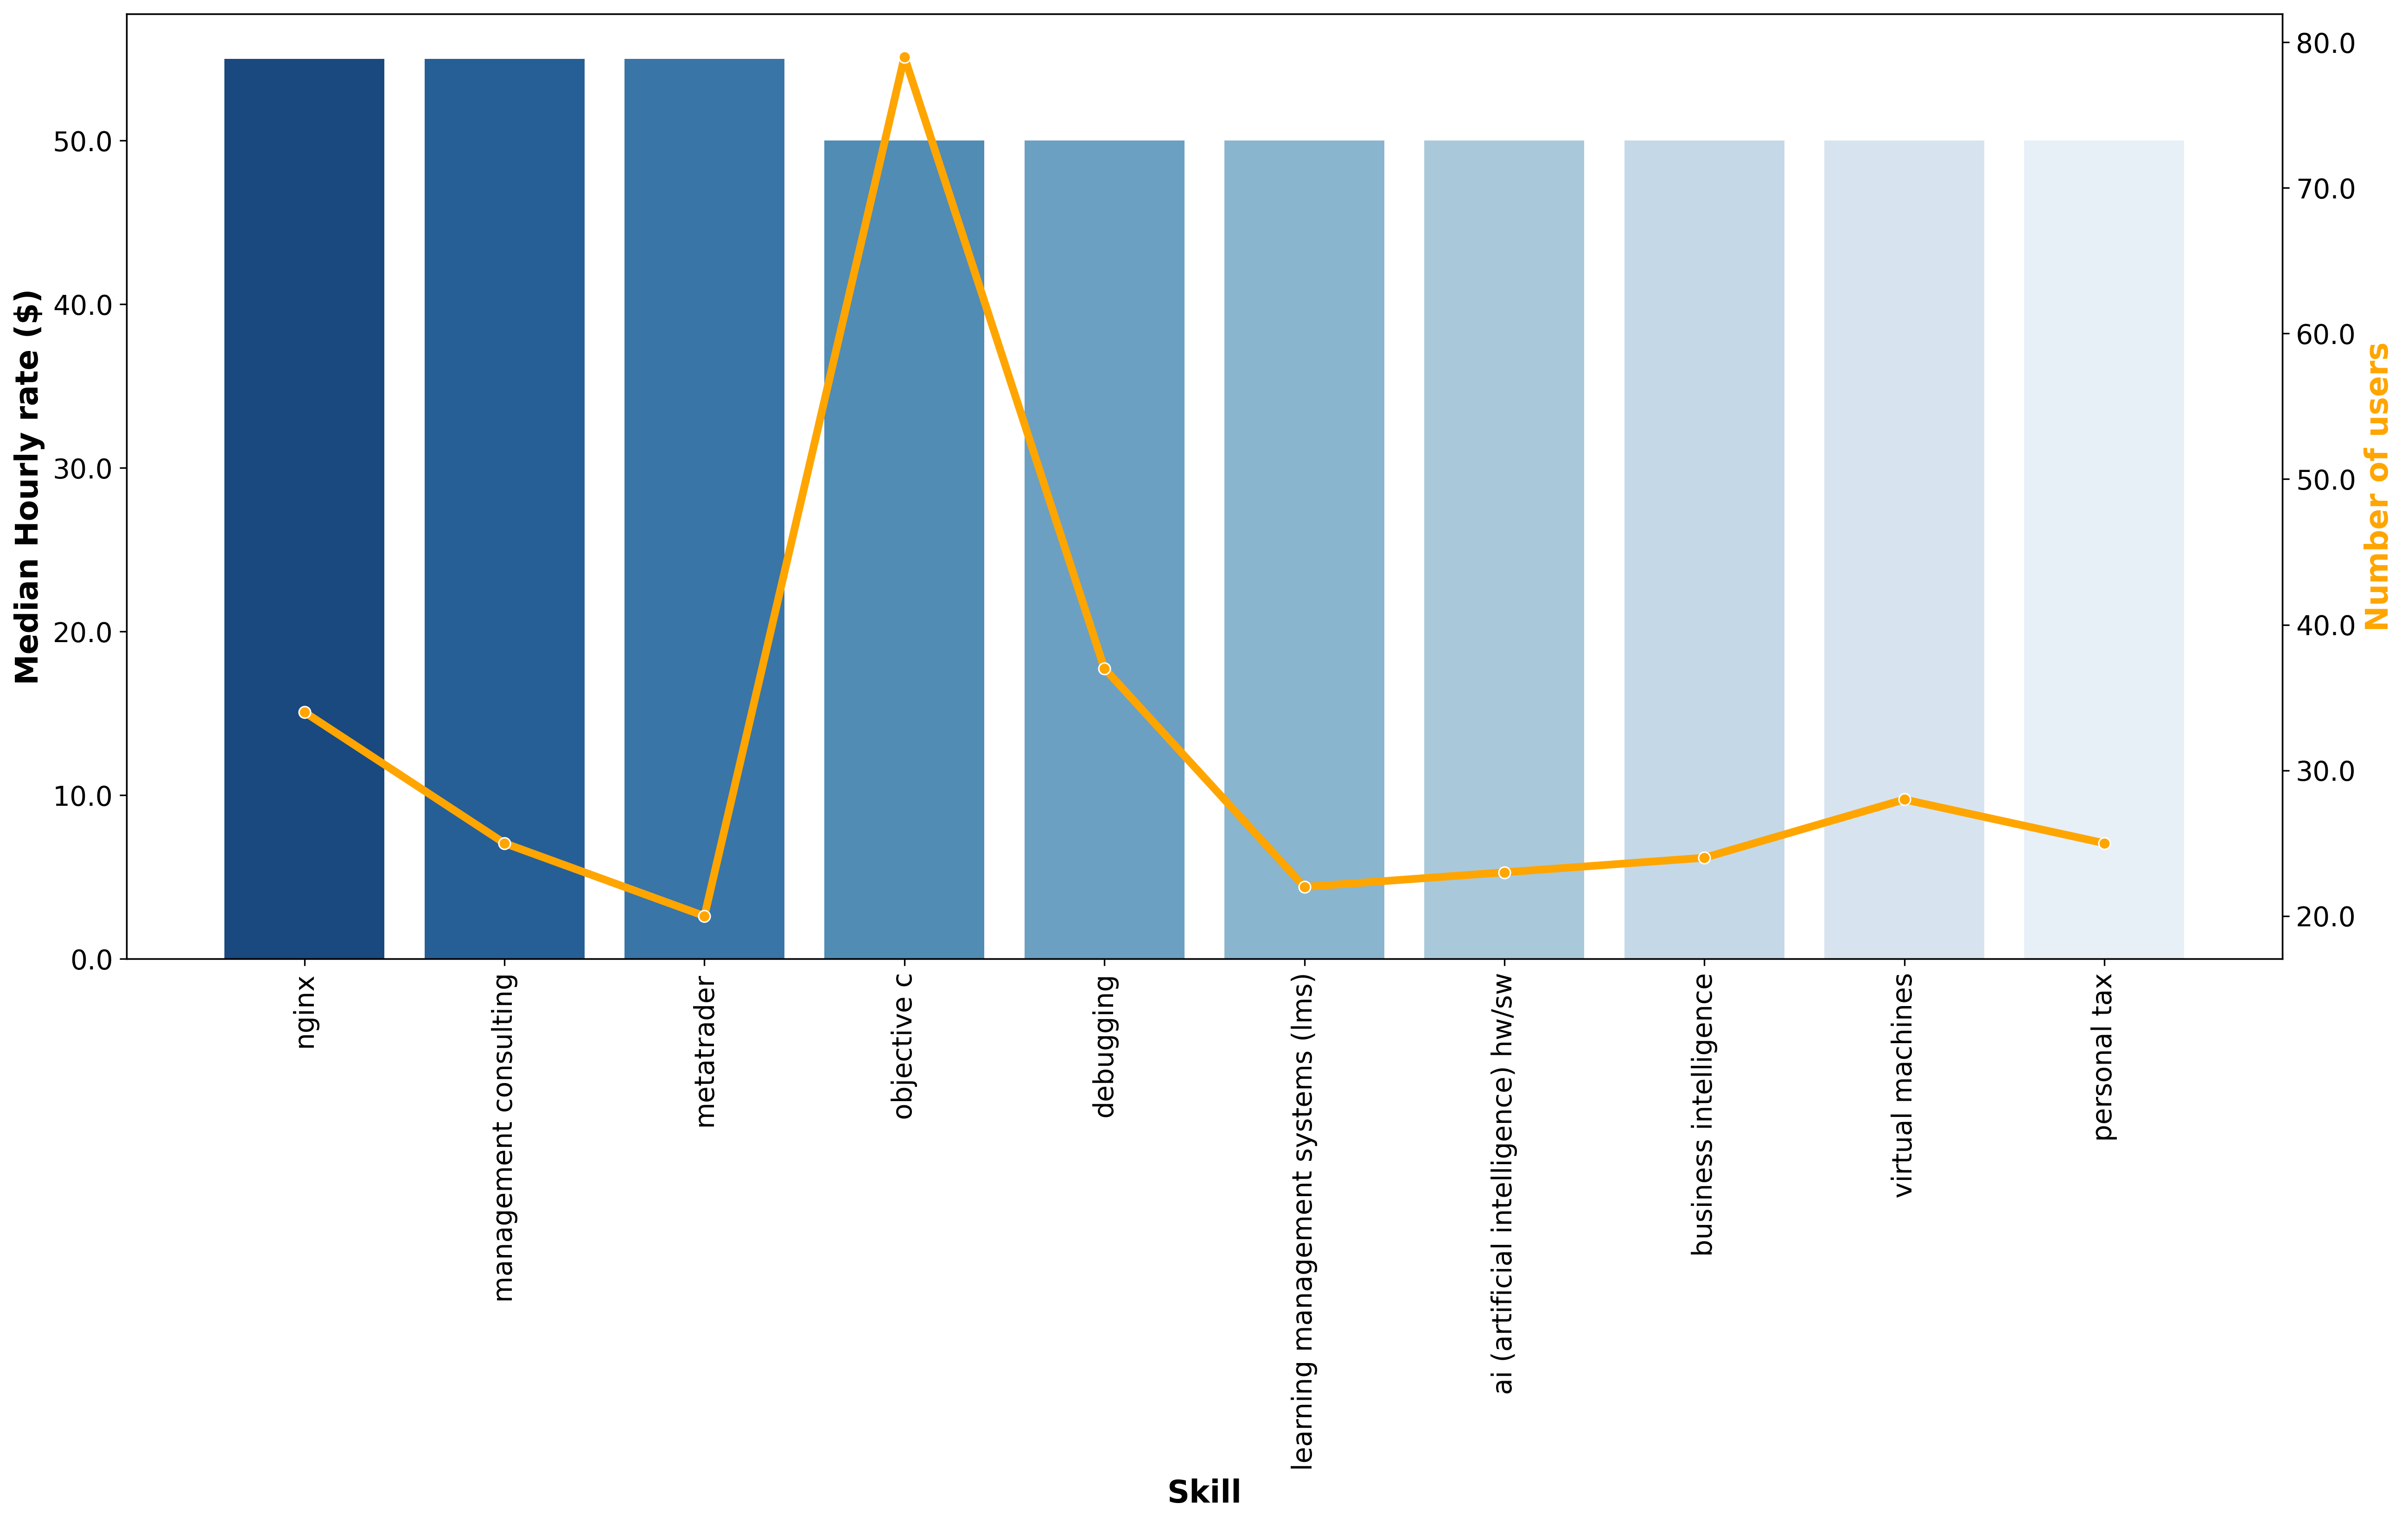

In [27]:
plt.figure(figsize=(20,9), dpi=300)

palette = sns.color_palette("Blues",10)
palette.reverse()

ax1 = sns.barplot(data=top_10, x='skill', y= 'median_hourly_rate', palette = palette, ci=None)
ax2 = plt.twinx(ax1)
sns.lineplot(data = top_10, x='skill', y='record_count',ax=ax2, color='orange',linewidth=4,marker="o")

ax1.set_ylabel('Median Hourly rate ($)',fontsize=16, fontweight= 'bold')
ax2.set_ylabel('Number of users',fontsize=16, fontweight= 'bold',color='orange')
ax1.set_xlabel('Skill',fontsize=16, fontweight= 'bold')
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 14, rotation = 90)
ax1.set_yticklabels(ax1.get_yticks(), fontsize = 14) 
ax2.set_yticklabels(ax2.get_yticks(), fontsize = 14) 

# ax.bar_label(ax.containers[0], 
#                 labels = [str(int(x))+'\nrecords' for x in top_10.record_count], 
#                 label_type='center', 
#                 fontweight='semibold', fontsize = 12)

plt.show()

#### d. Average hourly pay by skill grouped by gender

In [28]:
#Dictionary to store skills, gender, and their average pays
skill_avg_gend_pay = {'skill':[], 'record_count':[], 'gender':[], 'median_hourly_rate':[]}

#Get all the skills in the dataframe
skills = [col for col in df.columns if 'skill_' in col]

#Iterate through each skill and compute the average hourly rate
for skill in skills:

    for gender in ['male','female']:

        #Add the skill in focus to the dataframe
        skill_avg_gend_pay['skill'].append(skill.replace('skill_','').replace('_',' '))

        #Gender records
        gend_series = df.loc[(df.gender == gender) & (df[skill].notnull()),'hourly_rate']

        #Get count
        skill_avg_gend_pay['record_count'].append(gend_series.count())

        #Note gender
        skill_avg_gend_pay['gender'].append(gender)

        #Get median
        skill_avg_gend_pay['median_hourly_rate'].append(np.median(gend_series))

#Make pandas dataframe
skill_avg_gend_pay_df = pd.DataFrame(skill_avg_gend_pay) 

/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



In [29]:
#Calculate pct_difference
skill_avg_gend_pay_df['pct_diff'] = skill_avg_gend_pay_df.groupby(['skill'])[['median_hourly_rate']].pct_change()

#Get absolute pct_diff
skill_avg_gend_pay_df['abs_pct_diff'] = abs(skill_avg_gend_pay_df['pct_diff'])

#Note the pct difference across each gender group – If positive male has higher avg hourly rate
skill_avg_gend_pay_df["grp_pct_diff"] = skill_avg_gend_pay_df.groupby(['skill'])[["pct_diff"]].transform(sum)

#Note the absolute pct difference across each gender group
skill_avg_gend_pay_df["grp_abs_pct_diff"] = skill_avg_gend_pay_df.groupby(['skill'])[["abs_pct_diff"]].transform(sum)

#Calculate total records by skill
skill_avg_gend_pay_df["total_records"] = skill_avg_gend_pay_df.groupby(['skill'])[["record_count"]].transform(sum)

skill_avg_gend_pay_df.head()


,skill,record_count,gender,median_hourly_rate,pct_diff,abs_pct_diff,grp_pct_diff,grp_abs_pct_diff,total_records
0,engineering,514,male,35.0,NaN,NaN,-0.285714,0.285714,587
1,engineering,73,female,25.0,-0.285714,0.285714,-0.285714,0.285714,587
2,building architecture,188,male,29.5,NaN,NaN,-0.152542,0.152542,263
3,building architecture,75,female,25.0,-0.152542,0.152542,-0.152542,0.152542,263
4,3d rendering,425,male,28.0,NaN,NaN,-0.107143,0.107143,559


**i. Show top 10 by skill median_hourly_rate (where skill record total >=20)**

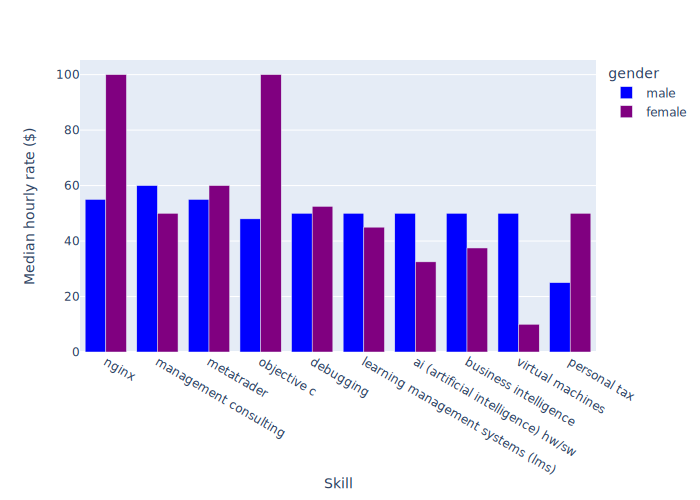

In [30]:
#Get top 10 skills from previos run
top_10_gend_pay = skill_avg_gend_pay_df.query("skill in @top_10.skill")

#Reorder based on overall hourly_rate
top_10_gend_pay['skill'] = pd.Categorical(top_10_gend_pay['skill'], categories=top_10.skill, ordered=True)
top_10_gend_pay = top_10_gend_pay.sort_values('skill')

fig = px.bar(top_10_gend_pay, x="skill", y="median_hourly_rate", 
             color="gender", color_discrete_sequence=["blue", "purple"], 
             barmode="group", labels={'skill':'Skill', 'median_hourly_rate':'Median hourly rate ($)'})
fig.show()

~Men seem to charge higher, on average, for the skills with the highest average hourly rates (again: we only look at skills with at least 20 records)~

Women seem to charge higher or at least competitively for the tech skills and other skills with higher hourly rates

**ii. Show top 10 by max pct_diff**

In [31]:
#Order by pct_diff
skill_avg_gend_pay_diff_sorted = skill_avg_gend_pay_df.sort_values("grp_abs_pct_diff", ascending=False)

#Get only skills with at least 20 records – not optimal way – REVISTTTT
num_top_skills = 10 #to be multiplied by 2 
skill_pct_diff_top_10 = skill_avg_gend_pay_diff_sorted.query("total_records >= 20")[:(num_top_skills*2)]

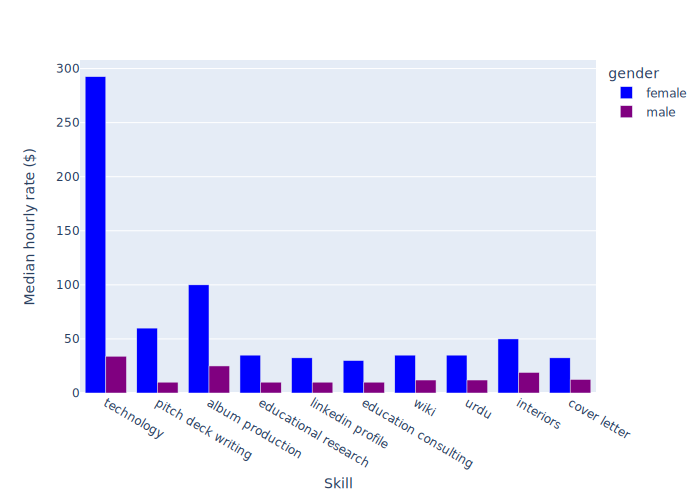

In [32]:
fig = px.bar(skill_pct_diff_top_10, x="skill", y="median_hourly_rate", 
             color="gender", color_discrete_sequence=["blue", "purple"], 
             barmode="group", labels={'skill':'Skill', 'median_hourly_rate':'Median hourly rate ($)'})
fig.show()

A lot of language skills, marketing, and research

For skills with the largest difference in gender pay, women seem to charge significantly higher than men

**SAMPLE SIZE FOR MALE & FEMALE IS IMPORTANT TO CONSIDER!**

Is this the case on average across all skills? : No (see below)

In [ ]:
skill_avg_gend_pay_diff_sorted.groupby('gender').avg_hourly_rate.agg([np.mean,np.std])

,mean,std
gender,,
female,40.359677,29.921698
male,42.696774,24.238717


**iii. Show top 10 skills where pct_difference in hourly rates is in favour of man**


The case for women is the above

In [34]:
#Order by pct_diff
skill_avg_gend_pay_male = skill_avg_gend_pay_df.sort_values("grp_pct_diff")

#Get only skills with at least 20 records – not optimal way – REVISTTTT
num_top_skills = 10 #to be multiplied by 2 
male_pct_diff_top_10 = skill_avg_gend_pay_male.query("total_records >= 20")[:(num_top_skills*2)]

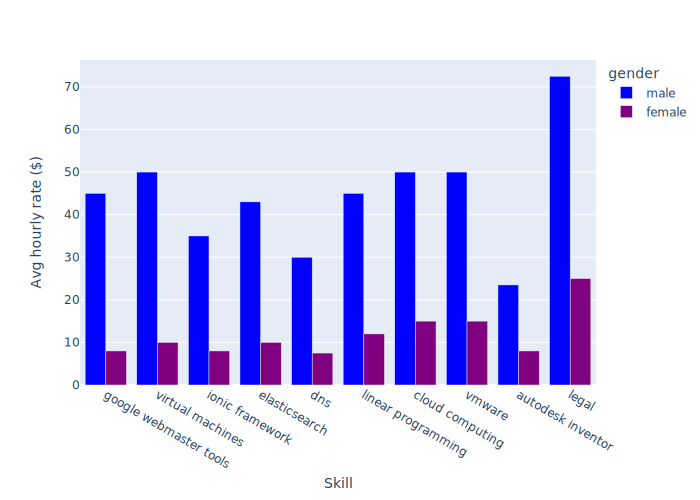

In [35]:
fig = px.bar(male_pct_diff_top_10, x="skill", y="median_hourly_rate", 
             color="gender", color_discrete_sequence=["blue", "purple"], 
             barmode="group", labels={'skill':'Skill', 'median_hourly_rate':'Avg hourly rate ($)'})
fig.show()

A lot of programming skills

**AGAIN SAMPLE SIZE IS IMPORTANT TO CONSIDER!**

### Gender and pay grade across industries

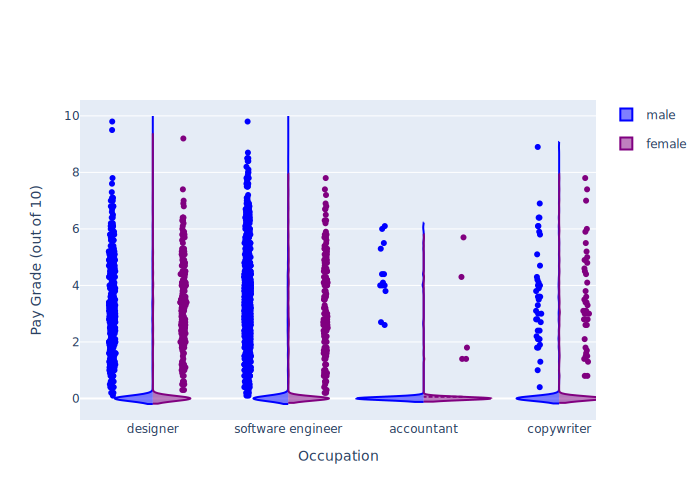

In [36]:
pointpos_male = [-0.6,-0.6,-0.6,-0.3]
pointpos_female = [0.45,0.55,0.6,0.4]
show_legend = [True,False,False,False]

plot_violin_with_points(df,'search_query','pay_grade','Occupation','Pay Grade (out of 10)',pointpos_male,
                        pointpos_female, show_legend)

metrics = [col for col in df.columns if 'pct_' in col][:3]

#Iterate through the different metrics
for metric in metrics:

    heatmap_df= df.groupby(['search_query','gender'])[metric].mean().reset_index()
    
    #Get the text for the heatmap
    invert_text =np.array([str(round(x))+'%' for x in heatmap_df[metric]]).reshape(4,2).T
    ttext = [invert_text[1],invert_text[0]]

    #Plot heatmap for the metric across occupation and genders
    fig = go.Figure(data=go.Heatmap(
            z=heatmap_df[metric],
            x=heatmap_df['search_query'],
            y=heatmap_df['gender'],
            text = ttext,
            texttemplate="%{text}",
            textfont={"size":20},
            colorscale='Viridis'))

    fig.update_layout(
        xaxis_title="Occupation",
        yaxis_title="Gender",
        title=metric.replace('_',' ').replace('pct','Percentage'))


    fig.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=acc27b92-84be-4130-8026-204943f38189' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>